In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble.forest import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection._search import GridSearchCV
from sklearn.model_selection._split import StratifiedKFold
from sklearn import svm

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
all_data = [train, test]

print('\ntrain.columns')
print(train.columns.values)

print('\ntrain.head')
print(train.head())

print('\ntrain_info')
print(train.info())

print('\ntest_info')
print(test.info())

print('\ntrain.describe')
print(train.describe())

survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

print ("\n\nSurvived: %i (%.1f%%)" % (len(survived), float(len(survived))/len(train)*100.0))
print ("Not Survived: %i (%.1f%%)" % (len(not_survived), float(len(not_survived))/len(train)*100.0))
print ("Total: %i" % len(train))

print('\ntrain.describe - number')
print(train.describe())

print('\ntrain.describe - categorical')
print(train.describe(include=['O']))



train.columns
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']

train.head
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282 

----------------------------------------
Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64


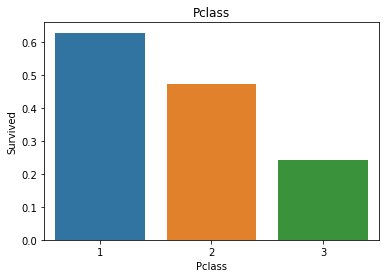

----------------------------------------
Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64


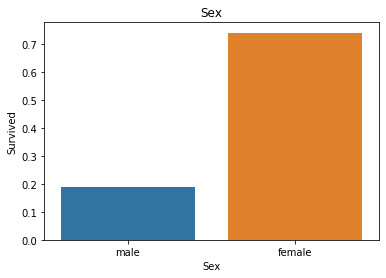

----------------------------------------
SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64


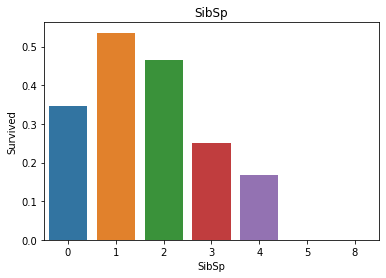

----------------------------------------
Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64


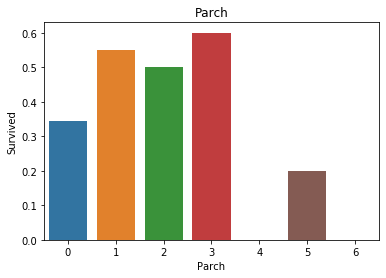

----------------------------------------
Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64


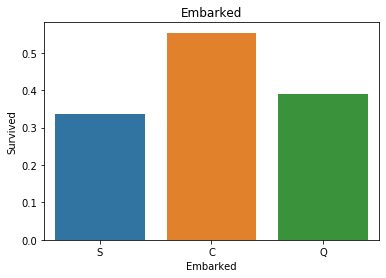

----------------------------------------
Conclusoes
Apesar de mais pessoas pertencerem a Pclass = 3, pessoas da Pclass = 1 tem maior chance de sobrevivencia
Apesar de mais pessoas serem homens, mulheres tem maior chance de sobrevivencia
Considerando ambos SibSp e Parch, apesar de mais gente ter viajado sem companhia,     a maior chance de sobrevivencia foram para aqueles que viajaram com companhia,     no primeiro caso, SibSP = 1 e SibSP = 2; no segundo caso, Parch = 1 Parch = 2 e Parch = 3
Apesar de mais pessoas terem embarcado por S, pessoas que embarcaram por C tem maior chance de sobrevivencia
----------------------------------------
Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


c:\users\victo\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


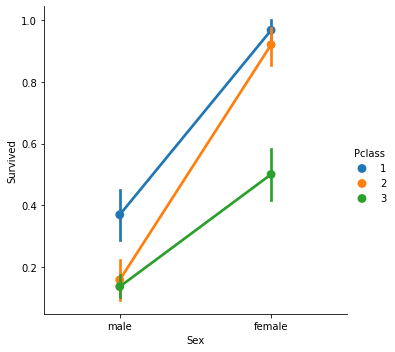

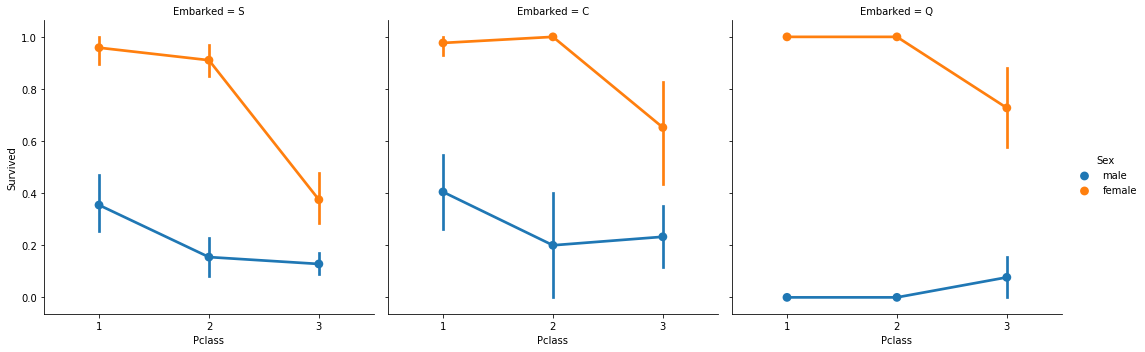

----------------------------------------
Conclusoes
Mulheres das Pclass 1 e 2 tem maior chance de sobrevivencia
Homens das Pclass 2 e 3 tem menor chance de sobrevivencia
Mulheres da Pclass 3 que embarcaram por S tem menor chance de sobrevivencia
Homens que embarcaram por Q tem menor chance de sobrevivencia


In [9]:
# --- plots    
def barplot(x_axis):
    print('-'*40)
    print(train.groupby(x_axis).Survived.value_counts())
    sns.barplot(x=x_axis, y='Survived', ci=None, data=train)
    plt.title(x_axis)
    plt.show()
 
 
barplot('Pclass')
barplot('Sex')
barplot('SibSp')
barplot('Parch')
barplot('Embarked')

print('-'*40)
print('Conclusoes')
print('Apesar de mais pessoas pertencerem a Pclass = 3, pessoas da Pclass = 1 tem maior chance de sobrevivencia')
print('Apesar de mais pessoas serem homens, mulheres tem maior chance de sobrevivencia')
print('Considerando ambos SibSp e Parch, apesar de mais gente ter viajado sem companhia, \
    a maior chance de sobrevivencia foram para aqueles que viajaram com companhia, \
    no primeiro caso, SibSP = 1 e SibSP = 2; no segundo caso, Parch = 1 Parch = 2 e Parch = 3')
print('Apesar de mais pessoas terem embarcado por S, pessoas que embarcaram por C tem maior chance de sobrevivencia')
print('-'*40)

tab = pd.crosstab(train['Pclass'], train['Sex'])
print (tab)

sns.factorplot('Sex', 'Survived', hue='Pclass', data=train)
plt.show()
      
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)
plt.show()

print('-'*40)
print('Conclusoes')
print('Mulheres das Pclass 1 e 2 tem maior chance de sobrevivencia')
print('Homens das Pclass 2 e 3 tem menor chance de sobrevivencia')
print('Mulheres da Pclass 3 que embarcaram por S tem menor chance de sobrevivencia')
print('Homens que embarcaram por Q tem menor chance de sobrevivencia')



----------------------------------------
Conclusoes
No geral: considerando ambos os sexos, a maior chance de sobrevivencia sao para aqueles com idade <= 7
No geral: Mulheres entre 15 e 40 e aquelas com mais de 50 anos tem maior chance de sobrevivencia
No geral: A maior chance de sobrevivencia nos homens sao para aqueles com idade <= 10


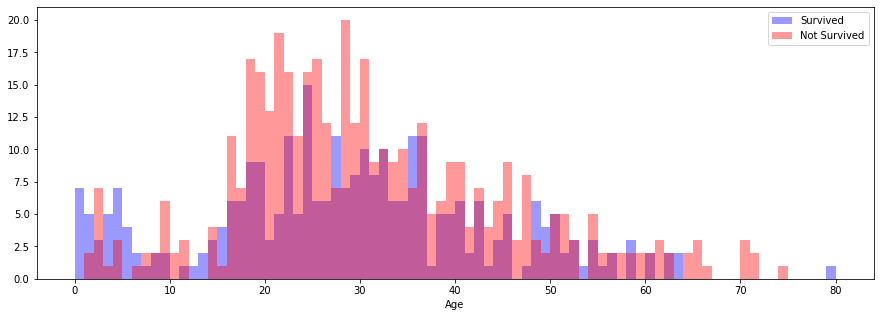

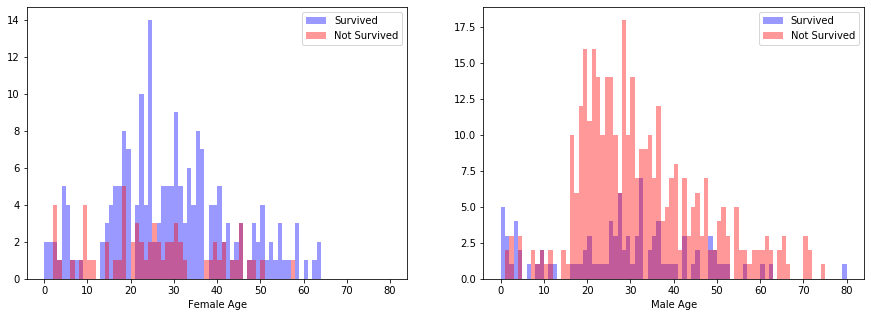

In [10]:
total_survived = train[train['Survived']==1]
total_not_survived = train[train['Survived']==0]

male_survived = train[(train['Survived']==1) & (train['Sex']=="male")]
female_survived = train[(train['Survived']==1) & (train['Sex']=="female")]

male_not_survived = train[(train['Survived']==0) & (train['Sex']=="male")]
female_not_survived = train[(train['Survived']==0) & (train['Sex']=="female")]

plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), \
             kde=False, color='blue', label='Survived')
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), \
             kde=False, color='red', axlabel='Age', label='Not Survived')
plt.legend()

plt.figure(figsize=[15,5])

plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, bins=range(0, 81, 1), \
             kde=False, color='blue', label='Survived')
sns.distplot(female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), \
             kde=False, color='red', axlabel='Female Age', label='Not Survived')
plt.legend()

plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, bins=range(0, 81, 1), \
             kde=False, color='blue', label='Survived')
sns.distplot(male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), \
             kde=False, color='red', axlabel='Male Age', label='Not Survived')
plt.legend()

print('-'*40)
print('Conclusoes')
print('No geral: considerando ambos os sexos, a maior chance de sobrevivencia sao para aqueles com idade <= 7')
print('No geral: Mulheres entre 15 e 40 e aquelas com mais de 50 anos tem maior chance de sobrevivencia')
print('No geral: A maior chance de sobrevivencia nos homens sao para aqueles com idade <= 10')


In [11]:
# --- feature engineering
# Sex
mapping = {'female': 0, 'male': 1}
for dataset in all_data:
    dataset['Sex'] = dataset['Sex'].map(mapping)

# Title
for dataset in all_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

print(pd.crosstab(train['Title'], train['Sex']))
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Mlle', 'Ms', 'Mme'], 'Other')

print(train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in all_data:
    dataset['Title'] = dataset['Title'].map(mapping)
    dataset['Title'] = dataset['Title'].fillna(0)


for dataset in all_data:
    dataset['Embarked'] = dataset['Embarked'].fillna(train.Embarked.dropna().mode()[0])
    
mapping = {'S': 0, 'C': 1, 'Q': 2}
for dataset in all_data:
    dataset['Embarked'] = dataset['Embarked'].map(mapping).astype(int)

    
for dataset in all_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train['AgeBand'] = pd.cut(train['Age'], 5)
print('-'*40)
print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

for dataset in all_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

for dataset in all_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())


train['FareBand'] = pd.qcut(train['Fare'], 4)
print('-'*40)
print (train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

for dataset in all_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print('-'*40)
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

for dataset in all_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)


Sex         0    1
Title             
Capt        0    1
Col         0    2
Countess    1    0
Don         0    1
Dr          1    6
Jonkheer    0    1
Lady        1    0
Major       0    2
Master      0   40
Miss      182    0
Mlle        2    0
Mme         1    0
Mr          0  517
Mrs       125    0
Ms          1    0
Rev         0    6
Sir         0    1
    Title  Survived
0  Master  0.575000
1    Miss  0.697802
2      Mr  0.156673
3     Mrs  0.792000
4   Other  0.444444
----------------------------------------
         AgeBand  Survived
0  (-0.08, 16.0]  0.541284
1   (16.0, 32.0]  0.346667
2   (32.0, 48.0]  0.380952
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


c:\users\victo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


----------------------------------------
          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081
----------------------------------------
   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [12]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop("PassengerId", axis=1).copy()

#print(X_train.describe())


print('\ntrain.head')
print(X_train.head())

def grid_search(clf, params):
    clf = GridSearchCV(clf, params, cv=5, n_jobs=4)
    clf.fit(X_train, y_train)
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)
    clf = clf.best_estimator_
    print(round(clf.score(X_train, y_train) * 100, 2))
    return clf

def classification():
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    acc = round(clf.score(X_train, y_train) * 100, 2)
    print ('\nAcc SVM = ' + str(acc))
    
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    acc = round(clf.score(X_train, y_train) * 100, 2)
    print ('\nAcc Random Forest = ' + str(acc))
    
    print('\nFeature importances')
    for i in range(len(X_train.columns)): 
        print(X_train.columns[i] + ' = ' + str(clf.feature_importances_[i]))
    
    
    clf = xgb.XGBClassifier()
    clf.fit(X_train, y_train)
    acc = round(clf.score(X_train, y_train) * 100, 2)
    print ('\nAcc XGBoost = ' + str(acc))
    
    print('\nFeature importances')
    for i in range(len(X_train.columns)): 
        print(X_train.columns[i] + ' = ' + str(clf.feature_importances_[i]))

def classification_grid_search():
    clf = svm.SVC()
    param_grid = {'kernel': ['linear', 'rbf'],
                  'C': [1, 1e3, 5e3, 1e4, 5e4, 1e5],
                  'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1] }
    clf = grid_search(clf, param_grid)

    clf = RandomForestClassifier()
    param_grid = { 
        'n_estimators': [200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4,5,6,7,8],
        'criterion' :['gini', 'entropy']
    }
    clf = grid_search(clf, param_grid)

    print('\nFeature importances')
    for i in range(len(X_train.columns)): 
        print(X_train.columns[i] + ' = ' + str(clf.feature_importances_[i]))

    clf = xgb.XGBClassifier(n_estimators=100)
    param_grid = {'nthread':[4], 
                  'objective':['binary:logistic'],
                  'learning_rate': [0.3], 
                  'max_depth': [5,6],
                  'min_child_weight': [3],
                  'silent': [1],
                  'subsample': [0.7],
                  'colsample_bytree': [0.7],
                  'n_estimators': [50,100]}
    clf = grid_search(clf, param_grid)
    
    print('\nFeature importances')
    for i in range(len(X_train.columns)): 
        print(X_train.columns[i] + ' = ' + str(clf.feature_importances_[i]))
        
classification()
#classification_grid_search()

print('-'*40)
print('Conclusoes')
print('Com tempo e com maquina para realizar a execucao dos experimentos, deve ser realizada a validacao cruzada\
    com o gridsearch para estimar os melhores parametros para cada modelo de classificacao. \
    Executar classification_grid_search(), se quiser pode definir mais possiveis valores dos parametros no gridsearch')
print('Considerando a execucao com parametros default dos modelos de classificacao (sem execucao do gridsearch): \
      o RandomForestClassifier deve ser utilizado, pois obteve melhores resultados na classificacao do conjunto de treinamento')
print('Em modelos baseados em arvores, como o RandomForestClassifier e o XGBClassifier, pode-se calcular a importancia\
    que cada feature teve. Enquanto a feature IsAlone tem menor importancia, Title teve menor importancia. \
    Talvez a feature IsAlone possa ser removida sem afetar o resultado da classificacao')


train.head
   Pclass  Sex  Age  Fare  Embarked  Title  IsAlone
0       3    1    1     0         0      1        0
1       1    0    2     3         1      3        0
2       3    0    1     1         0      2        1
3       1    0    2     3         0      3        0
4       3    1    2     1         0      1        1

Acc SVM = 83.73

Acc Random Forest = 86.64

Feature importances
Pclass = 0.16997415629794066
Sex = 0.2494831658481304
Age = 0.11200599810416725
Fare = 0.12417470875327172
Embarked = 0.06525206783942596
Title = 0.23620148561680857
IsAlone = 0.042908417540255546


c:\users\victo\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\victo\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Acc XGBoost = 84.18

Feature importances
Pclass = 0.1655745
Sex = 0.3626584
Age = 0.023243804
Fare = 0.04283343
Embarked = 0.03827523
Title = 0.34283066
IsAlone = 0.024583977
----------------------------------------
Conclusoes
Com tempo e com maquina para realizar a execucao dos experimentos, deve ser realizada a validacao cruzada    com o gridsearch para estimar os melhores parametros para cada modelo de classificacao.     Executar classification_grid_search(), se quiser pode definir mais possiveis valores dos parametros no gridsearch
Considerando a execucao com parametros default dos modelos de classificacao (sem execucao do gridsearch):       o RandomForestClassifier deve ser utilizado, pois obteve melhores resultados na classificacao do conjunto de treinamento
Em modelos baseados em arvores, como o RandomForestClassifier e o XGBClassifier, pode-se calcular a importancia    que cada feature teve. Enquanto a feature IsAlone tem menor importancia, Title teve menor importancia.     Ta